In [1]:
!unzip face_dataset.zip

Archive:  face_dataset.zip
   creating: face_dataset/
  inflating: face_dataset/.DS_Store  
  inflating: __MACOSX/face_dataset/._.DS_Store  
   creating: face_dataset/test/
   creating: face_dataset/train/
   creating: face_dataset/test/Class 3 No Touch w: Hands/
  inflating: face_dataset/test/.DS_Store  
  inflating: __MACOSX/face_dataset/test/._.DS_Store  
   creating: face_dataset/test/Class 1 Touch /
   creating: face_dataset/test/Class 2 No Hands/
   creating: face_dataset/train/Class 3 No Touch w: Hands/
  inflating: face_dataset/train/.DS_Store  
  inflating: __MACOSX/face_dataset/train/._.DS_Store  
   creating: face_dataset/train/Class 1 Touch /
   creating: face_dataset/train/Class 2 No Hands/
  inflating: face_dataset/test/Class 3 No Touch w: Hands/g_c3_5_27test12.jpg  
  inflating: __MACOSX/face_dataset/test/Class 3 No Touch w: Hands/._g_c3_5_27test12.jpg  
  inflating: face_dataset/test/Class 3 No Touch w: Hands/g_c3_5_6test12.jpg  
  inflating: __MACOSX/face_dataset/test/

In [1]:
import numpy as np
import tensorflow as tf

2023-04-06 19:50:10.411342: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-06 19:50:11.696127: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-06 19:50:11.697193: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 19:50:16.025454: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
base_path = "face_dataset/"

pic_size = 48

from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "test",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)
    

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [6]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 3

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
%%time

# number of epochs to train the NN
epochs = 20

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

<timed exec>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20


2023-04-06 19:59:35.862910: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


18/18 [==============================] - ETA: 0s - loss: 1.1640 - accuracy: 0.4525

2023-04-06 20:01:21.605877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


18/18 [==============================] - 112s 6s/step - loss: 1.1640 - accuracy: 0.4525 - val_loss: 1.7326 - val_accuracy: 0.2188
Epoch 2/20
18/18 [==============================] - 112s 6s/step - loss: 0.7661 - accuracy: 0.6607 - val_loss: 1.3706 - val_accuracy: 0.1797
Epoch 3/20
18/18 [==============================] - 113s 6s/step - loss: 0.5352 - accuracy: 0.7874 - val_loss: 1.4579 - val_accuracy: 0.2129
Epoch 4/20
18/18 [==============================] - 113s 6s/step - loss: 0.3837 - accuracy: 0.8622 - val_loss: 1.3125 - val_accuracy: 0.2949
Epoch 5/20
18/18 [==============================] - 115s 6s/step - loss: 0.2970 - accuracy: 0.9010 - val_loss: 1.3220 - val_accuracy: 0.3496
Epoch 6/20
18/18 [==============================] - 113s 6s/step - loss: 0.2285 - accuracy: 0.9283 - val_loss: 1.4197 - val_accuracy: 0.3711
Epoch 7/20
18/18 [==============================] - 112s 6s/step - loss: 0.1805 - accuracy: 0.9450 - val_loss: 1.5091 - val_accuracy: 0.4141
Epoch 8/20
18/18 [======

In [8]:
# serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

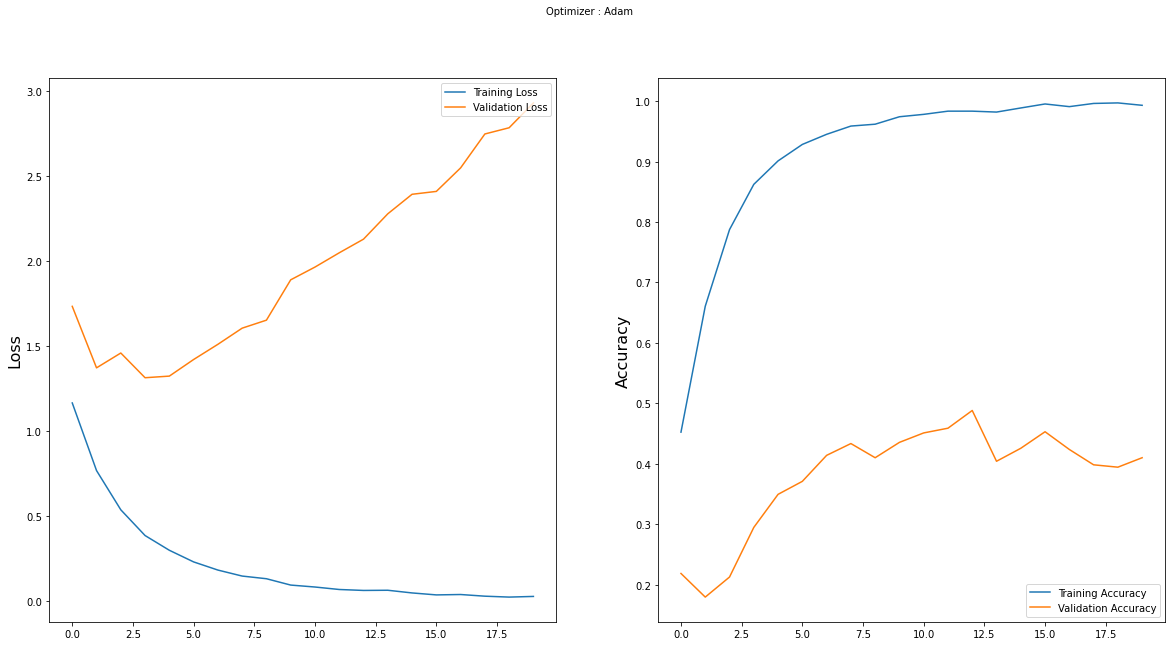

In [10]:
# plot the evolution of Loss and Acuracy on the train and validation sets
#print(history.history)
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

/tmp/slurmtmp.24156001/ipykernel_22615/3468807508.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(generator=validation_generator)
2023-04-06 20:47:39.222369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


<Figure size 432x288 with 0 Axes>

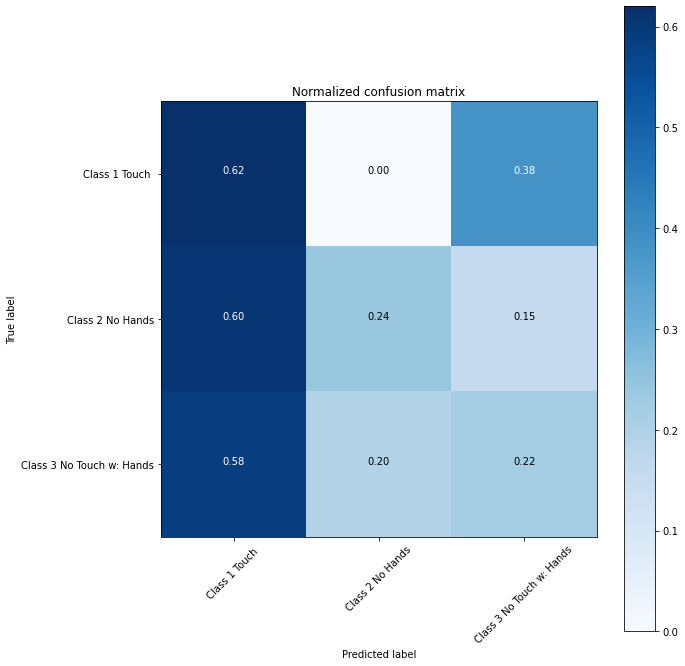

In [11]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()